In [1]:
#  Import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as pplot
#import seaborn as seab
import sklearn as scikit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import carbon emissions dataset.
ce_US = pd.read_csv('data/CO2_Emissions_US.csv')
print(ce_US.head())

   year state-name                                      sector-name  \
0  1970    Alabama              Industrial carbon dioxide emissions   
1  1970    Alabama              Industrial carbon dioxide emissions   
2  1970    Alabama              Industrial carbon dioxide emissions   
3  1970    Alabama              Industrial carbon dioxide emissions   
4  1970    Alabama  Total carbon dioxide emissions from all sectors   

     fuel-name       value  
0         Coal   26.721507  
1    Petroleum    3.577779  
2  Natural Gas    8.944097  
3    All Fuels   39.243383  
4    All Fuels  102.646851  


In [3]:
# Import consumer behavior dataset.
cb = pd.read_csv('data/shopping_behavior_updated.csv'); # Consumer behavior and spending habits
print(cb.head());

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [4]:
cb_column_filter = cb.filter(items=['Age', 'Purchase Amount (USD)', 'Location'], axis = 1)

cb_filter = cb_column_filter[(cb_column_filter['Purchase Amount (USD)'] < 100 )]

cb_filter

,Age,Purchase Amount (USD),Location
0,55,53,Kentucky
1,19,64,Maine
2,50,73,Massachusetts
3,21,90,Rhode Island
4,45,49,Oregon
...,...,...,...
3895,40,28,Virginia
3896,52,49,Iowa
3897,46,33,New Jersey
3898,44,77,Minnesota


In [5]:
# Join carbon emissions and consumer behavior datasets.
ce_cb_merged = ce_US.merge(cb_filter, left_on='state-name', right_on= 'Location')

ce_cb_filter = ce_cb_merged.filter(items=['Age', 'state-name', 'Purchase Amount (USD)', 'value'])

ce_cb = ce_cb_filter.rename(columns={'state-name': 'State', 'value': 'Million Metric Tons'})

ce_cb

,Age,State,Purchase Amount (USD),Million Metric Tons
0,25,Alabama,36,26.721507
1,65,Alabama,83,26.721507
2,22,Alabama,29,26.721507
3,58,Alabama,85,26.721507
4,38,Alabama,96,26.721507
...,...,...,...,...
4465603,58,Wyoming,36,10.198574
4465604,20,Wyoming,27,10.198574
4465605,42,Wyoming,60,10.198574
4465606,64,Wyoming,57,10.198574


In [6]:
# Copy joined data. 
data = ce_cb.copy()

#Dependent variable
x_dep = data.drop(columns = {'Age', 'State', 'Purchase Amount (USD)'}, axis = 1)

#Independent variable
y_indep = data.drop({'Million Metric Tons', 'State'}, axis = 1)

print(x_dep.head())

print(y_indep.head())

   Million Metric Tons
0            26.721507
1            26.721507
2            26.721507
3            26.721507
4            26.721507
   Age  Purchase Amount (USD)
0   25                     36
1   65                     83
2   22                     29
3   58                     85
4   38                     96


In [7]:
x_dep.select_dtypes(include='object').columns.to_list()

[]

In [8]:
# Train and test data.

x_dep_train, x_dep_test, y_indep_train, y_indep_test = train_test_split(x_dep, y_indep, test_size=0.1, random_state=30)

print(x_dep_train.head())
print(y_indep_train.head())

         Million Metric Tons
2037919            55.497988
131541             24.039895
1462159             0.000106
3163372            16.237058
3402967            29.324607
         Age  Purchase Amount (USD)
2037919   64                     95
131541    31                     43
1462159   45                     99
3163372   41                     51
3402967   62                     37


In [9]:
# Linear regression output

linear_regression = LinearRegression()

lr = linear_regression.fit(x_dep_train, y_indep_train)

lr

LinearRegression()

In [10]:
# Regression intercepts and coefficients

intercept = lr.intercept_
coefficients = lr.coef_

print(intercept)
print(coefficients)

[44.10138933 59.34335916]
[[-0.00030239]
 [ 0.00335973]]


In [11]:
# Regression training predictions

train_indep_pred = lr.predict(x_dep_train)
test_indep_pred = lr.predict(x_dep_test)

print(train_indep_pred)
print(test_indep_pred)

[[44.08460719 59.52981765]
 [44.09411986 59.42412682]
 [44.1013893  59.34335952]
 ...
 [44.09800188 59.38099554]
 [44.08006363 59.58029899]
 [44.10135476 59.34374329]]
[[44.09836857 59.37692142]
 [44.09293045 59.43734185]
 [44.10094768 59.3482662 ]
 ...
 [44.09895065 59.37045415]
 [44.09497822 59.41459001]
 [44.09949118 59.3644486 ]]


In [13]:
# Root squared mean

train_r2 = r2_score(y_true= y_indep_train, y_pred = train_indep_pred)
test_r2 = r2_score(y_true= y_indep_test, y_pred = test_indep_pred)

print(train_r2)
print(test_r2)

1.6586878806179595e-05
3.1002394970003344e-05


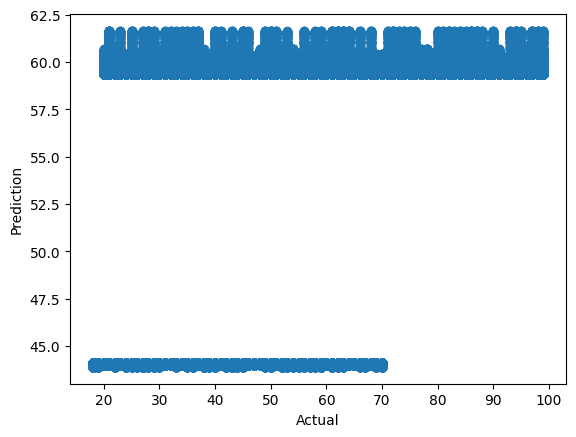

In [14]:
# Matplotlib visuals

pplot.scatter(y_indep_train, train_indep_pred)
pplot.xlabel("Actual")
pplot.ylabel("Prediction")
pplot.show()